## Assignment 5: Travel Review Ratings


**Submitted by: Indronil Bhattacharjee**

In [1]:
import numpy as np
import pandas as pd 

# Load the dataset
data = pd.read_csv("google_review_ratings.csv")

/kaggle/input/google-review-ratings/google_review_ratings.csv


**Question 1. (k-means)**

1a. Finding the best k based on  Silhouette coefficient

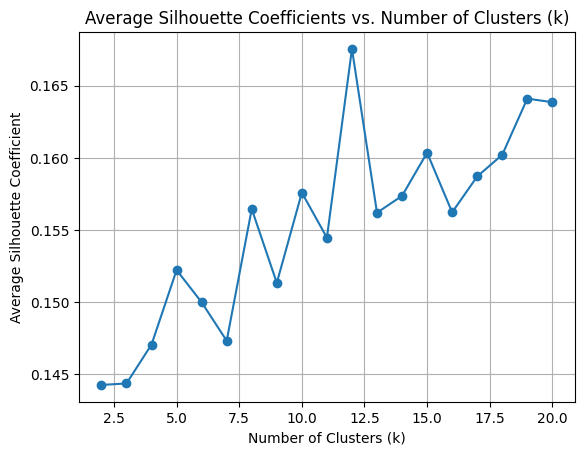

Best k: 12


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

# Select the features you want to use for clustering (e.g., data[['feature1', 'feature2', ...]])
features = data.iloc[:, 1:]

from sklearn.impute import SimpleImputer

# Replace NaN values with the mean of each column
imputer = SimpleImputer(strategy="mean")
features = imputer.fit_transform(features)

# Range of k values
k_values = range(2, 21)
silhouette_scores_kmeans = []

# Compute Silhouette coefficient for different k values
for k in k_values:
    avg_silhouette_score = 0
    for _ in range(5):  # Run K-Means 5 times for each k
        kmeans = KMeans(n_clusters=k, random_state=0)
        cluster_labels = kmeans.fit_predict(features)
        avg_silhouette_score += silhouette_score(features, cluster_labels)
    avg_silhouette_score /= 5  # Average over 5 runs
    silhouette_scores_kmeans.append(avg_silhouette_score)

# Plot the average Silhouette coefficients for different k
plt.plot(k_values, silhouette_scores_kmeans, marker='o')
plt.title("Average Silhouette Coefficients vs. Number of Clusters (k)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Average Silhouette Coefficient")
plt.grid(True)
plt.show()

# The best k is where Silhouette coefficient is highest
best_k = k_values[np.argmax(silhouette_scores_kmeans)]
print("Best k:", best_k)

1b. Training k-means model with the best k and reporting the centroids of clusters

In [3]:
best_kmeans = KMeans(n_clusters=best_k, random_state=0)
best_kmeans.fit(features)
centroids = best_kmeans.cluster_centers_
print("Cluster Centroids:")
print(centroids)

Cluster Centroids:
[[2.58306306 2.54192192 2.39036036 1.97435435 1.83       1.56453453
  1.49237237 1.29486486 1.46084084 1.49630631 1.4993994  1.08387387
  0.99957958 1.27294294 2.46756757 1.68456456 1.43906907 1.33714715
  1.68735736 2.25882883 3.09216216 4.3215015  3.42363363 3.29003003]
 [1.14829837 4.98480186 2.20741259 2.05783217 2.25440559 3.06030303
  4.63596737 3.42058275 4.34762238 3.53946387 2.59062937 2.1981352
  1.86265734 3.00741259 3.03275058 0.72939394 0.67876457 0.69016317
  0.67144522 0.82659674 0.79282051 0.8090676  0.8293007  0.95531469]
 [1.24601316 1.42939474 1.71228947 2.17055263 2.27046053 2.58097368
  3.64909211 3.71442105 4.55152632 4.55010526 4.12588158 2.01676316
  1.64163158 1.38232895 1.27647368 1.05517105 0.62452632 0.33989474
  0.30411842 0.40644737 0.56419737 1.18188158 1.03177632 1.20017105]
 [1.43073529 1.69436275 1.97240196 2.13578431 2.14058824 2.05009804
  3.50656863 2.23504902 2.69632353 2.53392157 2.63362745 2.39666667
  2.48745098 3.29995098 4.1

1c. Projecting the data using PCA with two principal components and plotting

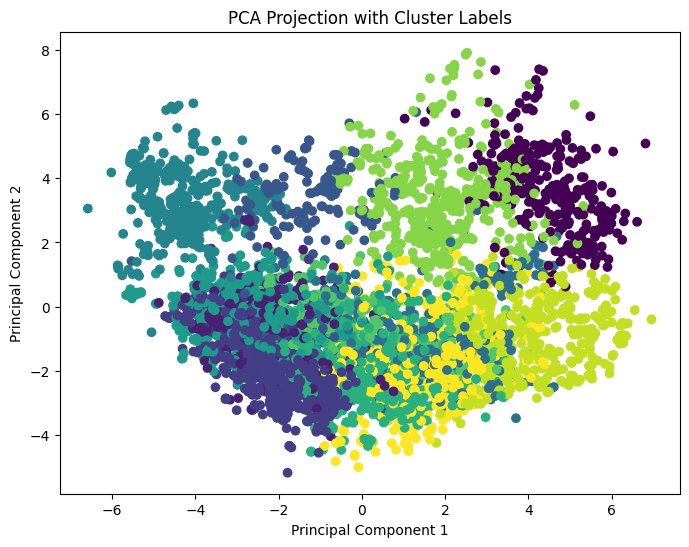

In [4]:
from sklearn.decomposition import PCA

# Project the data using PCA with two principal components
pca = PCA(n_components=2)
projected_data = pca.fit_transform(features)

# Draw a scatter plot with cluster IDs as labels
cluster_labels = best_kmeans.labels_
plt.figure(figsize=(8, 6))
plt.scatter(projected_data[:, 0], projected_data[:, 1], c=cluster_labels, cmap='viridis')
plt.title("PCA Projection with Cluster Labels")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

The visual examination and Silhouette coefficient serve as complementary methods to assess the quality of clustering. High Silhouette scores and visually well-separated clusters are consistent with each other and suggest that the clustering is successful. Low scores and overlapping clusters in the visualization may indicate issues with the clustering algorithm or choice of hyperparameters.

Here, the clusters at the right side and top-left corners appear to be well separated keeping some outlying points out. Some clusters of bottom-left corner appear to be overlapping. The best Silhouette coefficient score for k=12 is 0.17. The much silhouette coefficient will be, clusters will be more separated and consistent.

**Question 2. (Gaussian Mixture Model and Spectral Clustering)**

2a. Gaussian Mixture model

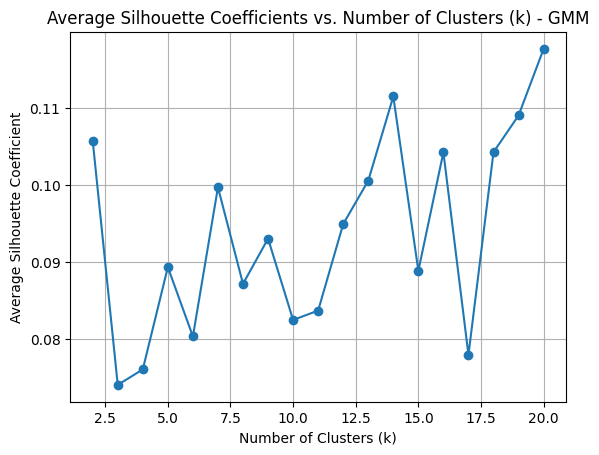

Best k (GMM): 20


In [5]:
from sklearn.mixture import GaussianMixture
features = data.iloc[:, 1:]

from sklearn.impute import SimpleImputer

# Replace NaN values with the mean of each column
imputer = SimpleImputer(strategy="mean")
features = imputer.fit_transform(features)

# Range of k values
k_values = range(2, 21)
silhouette_scores_gmm = []
# Compute Silhouette coefficient for different k values
for k in k_values:
    avg_silhouette_score = 0
    for _ in range(5):  # Run GMM 5 times for each k
        gmm = GaussianMixture(n_components=k, random_state=0)
        cluster_labels = gmm.fit_predict(features)
        avg_silhouette_score += silhouette_score(features, cluster_labels)
    avg_silhouette_score /= 5  # Average over 5 runs
    silhouette_scores_gmm.append(avg_silhouette_score)

# Plot the average Silhouette coefficients for different k
plt.plot(k_values, silhouette_scores_gmm, marker='o')
plt.title("Average Silhouette Coefficients vs. Number of Clusters (k) - GMM")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Average Silhouette Coefficient")
plt.grid(True)
plt.show()

# The best k is where Silhouette coefficient is highest
best_k_gmm = k_values[np.argmax(silhouette_scores_gmm)]
print("Best k (GMM):", best_k_gmm)


In [6]:
best_gmm = GaussianMixture(n_components=best_k_gmm, random_state=0)
best_gmm.fit(features)
cluster_means = best_gmm.means_
print("Cluster Centroids (Gausian Mixture):")
print(cluster_means)

Cluster Centroids (Gausian Mixture):
[[2.47582609 2.49       2.24773913 1.77747826 1.72269565 1.35113043
  1.28573913 1.28756522 1.46321739 1.58608696 1.65886957 0.91947826
  0.90252174 1.15008696 5.         1.93356521 1.2355652  1.33356521
  1.3547826  2.22443478 3.7272174  3.89565218 3.57078261 2.92608695]
 [1.18960148 5.         2.50391104 2.39127225 2.51306106 3.2461729
  4.41138062 3.17831432 4.05084632 3.15182421 2.4387301  2.29731193
  1.87749488 3.33994773 2.65577394 0.71496768 0.70414635 0.71325639
  0.61744214 0.88773826 0.76613341 0.76729651 0.82405268 1.0203946 ]
 [1.31230897 1.43301763 1.55474756 2.24998508 2.35714926 2.49436551
  3.33512136 3.67847617 4.48558652 4.50088608 5.         2.06993958
  1.55841396 1.31108568 1.38952808 1.19890656 0.7058963  0.27044773
  0.20533015 0.21493709 0.46585474 1.46935015 1.04639788 1.28165831]
 [1.48280253 1.71764333 1.92184718 1.89885339 1.88668788 1.86878979
  3.29573268 2.15522295 2.55707012 2.36445859 2.30127391 2.40624208
  2.50579

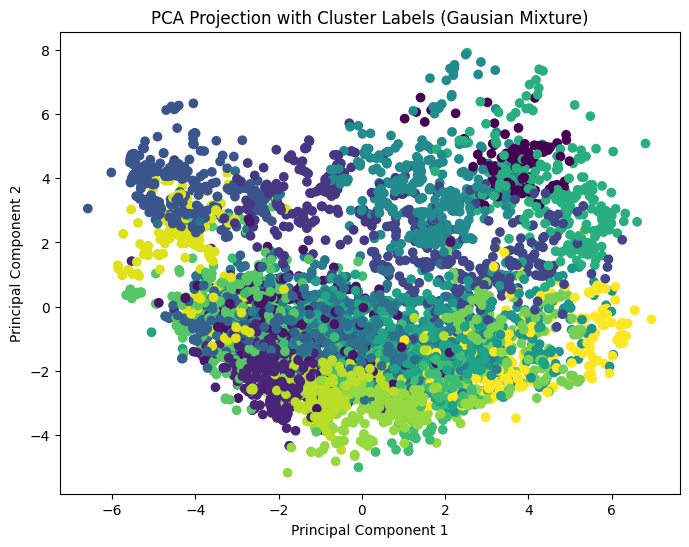

In [7]:
from sklearn.decomposition import PCA

# Project the data using PCA with two principal components
pca = PCA(n_components=2)
projected_data_gmm = pca.fit_transform(features)

# Draw a scatter plot with cluster IDs as labels
cluster_labels_gmm = best_gmm.fit_predict(features)

# Draw a scatter plot with cluster IDs as labels
plt.figure(figsize=(8, 6))
plt.scatter(projected_data_gmm[:, 0], projected_data_gmm[:, 1], c=cluster_labels_gmm, cmap='viridis')
plt.title("PCA Projection with Cluster Labels (Gausian Mixture)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

Here, a lot of the clusters appear to be overlapping. The best Silhouette coefficient score for k=20 is 0.115 which is less than that of k-means. That is the reason why most of the clusters appear to be overlapping for Gausian mixture model.

2b. Spectral Clustering model

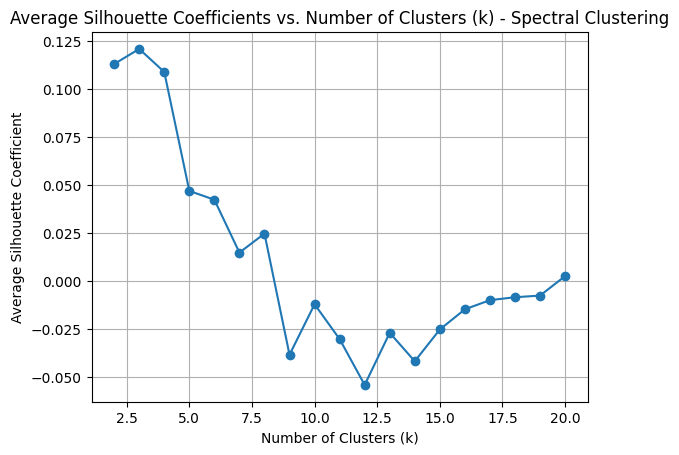

Best k (Spectral Clustering): 3


In [8]:
from sklearn.cluster import SpectralClustering

features = data.iloc[:, 1:]

from sklearn.impute import SimpleImputer

# Replace NaN values with the mean of each column
imputer = SimpleImputer(strategy="mean")
features = imputer.fit_transform(features)

# Range of k values
k_values = range(2, 21)
silhouette_scores_spectral = []

# Compute Silhouette coefficient for different k values
for k in k_values:
    avg_silhouette_score = 0
    for _ in range(5):  # Run Spectral Clustering 5 times for each k
        spectral = SpectralClustering(n_clusters=k, n_init=10, affinity='nearest_neighbors', n_neighbors=10, eigen_solver='arpack', n_jobs=-1)
        cluster_labels = spectral.fit_predict(features)
        avg_silhouette_score += silhouette_score(features, cluster_labels)
    avg_silhouette_score /= 5  # Average over 5 runs
    silhouette_scores_spectral.append(avg_silhouette_score)

# Plot the average Silhouette coefficients for different k
plt.plot(k_values, silhouette_scores_spectral, marker='o')
plt.title("Average Silhouette Coefficients vs. Number of Clusters (k) - Spectral Clustering")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Average Silhouette Coefficient")
plt.grid(True)
plt.show()

# The best k is where Silhouette coefficient is highest
best_k_spectral = k_values[np.argmax(silhouette_scores_spectral)]
print("Best k (Spectral Clustering):", best_k_spectral)


In [9]:
best_spectral = SpectralClustering(n_clusters=best_k, n_init=10, affinity='nearest_neighbors', n_neighbors=10, eigen_solver='arpack', n_jobs=-1)
cluster_labels = best_spectral.fit_predict(features)
cluster_centers = np.array([np.mean(features[cluster_labels == i], axis=0) for i in range(best_k)])
print("Cluster centers (Spectral Clustering):")
print(cluster_centers)

Cluster centers (Spectral Clustering):
[[0.97614334 1.24300341 1.55257679 1.66467577 1.82385666 2.09703072
  3.16220137 3.00982935 3.76459044 3.8640273  4.46735495 3.10250853
  2.88196246 2.70675768 1.81003413 0.93549488 0.87141638 0.62136519
  0.90546075 0.66569966 0.41421502 0.97447099 0.70783276 0.94726962]
 [1.214414   2.66711821 2.80167428 2.79768645 3.14317605 3.45446981
  4.15885337 3.04369356 3.76927955 3.21542872 2.34634196 1.8134348
  1.84604769 2.4523795  2.52853881 1.0580619  0.5906342  0.47442922
  0.53394216 0.69893455 0.79507864 0.9078691  0.96032471 1.06998985]
 [0.35263158 0.44917293 1.45909774 1.49165414 1.48315789 1.49195489
  1.58684211 1.54496241 2.63       2.96736842 3.18270677 4.96887218
  4.71984962 5.         5.         0.77586466 0.77458647 1.05308271
  0.86323308 0.70030075 0.36488722 0.32210526 0.30225564 0.30646617]
 [1.58371083 2.17448006 2.68268519 3.92533476 4.16742877 3.37609687
  3.17197293 2.4585114  2.7124359  2.72350427 2.74110399 2.11641738
  2.324

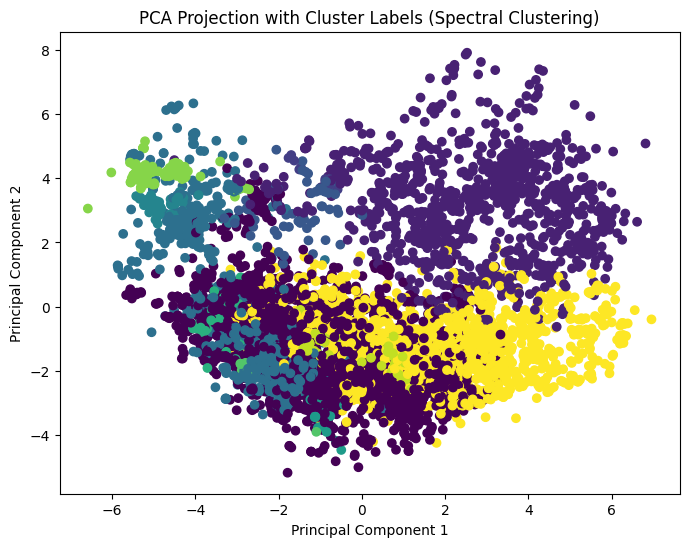

In [10]:
from sklearn.decomposition import PCA

# Project the data using PCA with two principal components
pca = PCA(n_components=2)
projected_data_spectral = pca.fit_transform(features)

# Draw a scatter plot with cluster IDs as labels
cluster_labels_spectral = best_spectral.fit_predict(features)

# Draw a scatter plot with cluster IDs as labels
plt.figure(figsize=(8, 6))
plt.scatter(projected_data_spectral[:, 0], projected_data_spectral[:, 1], c=cluster_labels_spectral, cmap='viridis')
plt.title("PCA Projection with Cluster Labels (Spectral Clustering)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

Here, the clusters at the right side and top-left corners appear to be well separated keeping some outlying points out. Some clusters of bottom-left corner appear to be overlapping. The best Silhouette coefficient score for k=3 is 0.125. The much silhouette coefficient will be, clusters will be more separated and consistent.

2c. Best method in terms of the average Silhouette coefficient

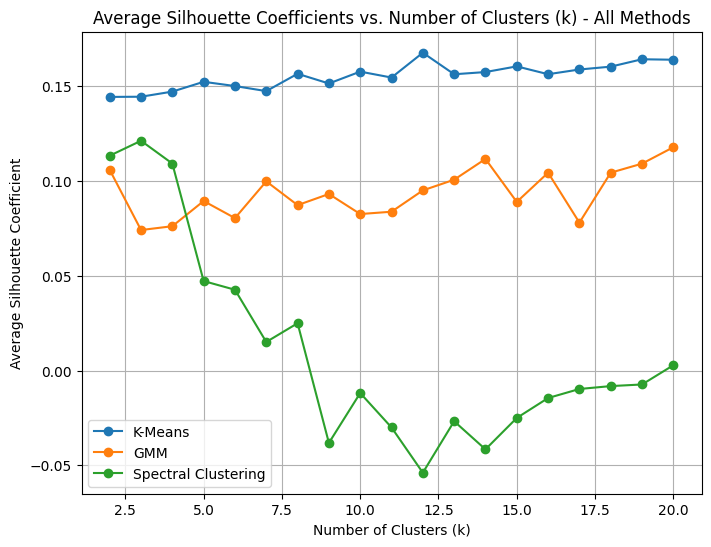

K-Means has the highest average Silhouette coefficient.


In [11]:
# Plot the average Silhouette coefficients for different k for all methods
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores_kmeans, marker='o', label='K-Means')
plt.plot(k_values, silhouette_scores_gmm, marker='o', label='GMM')
plt.plot(k_values, silhouette_scores_spectral, marker='o', label='Spectral Clustering')
plt.title("Average Silhouette Coefficients vs. Number of Clusters (k) - All Methods")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Average Silhouette Coefficient")
plt.legend()
plt.grid(True)
plt.show()

# Determine which method has the highest average Silhouette coefficient
best_method = np.argmax([max(silhouette_scores_kmeans), max(silhouette_scores_gmm), max(silhouette_scores_spectral)])
if best_method == 0:
    print("K-Means has the highest average Silhouette coefficient.")
elif best_method == 1:
    print("GMM has the highest average Silhouette coefficient.")
else:
    print("Spectral Clustering has the highest average Silhouette coefficient.")

**Question 3. (DBSCAN)**

3a. Computing best Silhouette coefficient

In [12]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from itertools import product

# Define a range of values for eps and min_samples
eps_values = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
min_samples_values = [2, 5, 10, 15, 20]

best_score = -1
best_eps = None
best_min_samples = None

for eps, min_samples in product(eps_values, min_samples_values):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = dbscan.fit_predict(features)
    score = silhouette_score(features, cluster_labels)
    
    if score > best_score:
        best_score = score
        best_eps = eps
        best_min_samples = min_samples

print("Best Silhouette Score:", best_score)
print("Best eps:", best_eps)
print("Best min_samples:", best_min_samples)

Best Silhouette Score: 0.26293079484588383
Best eps: 2.0
Best min_samples: 2


3b. Clustering with best DBSCAN model

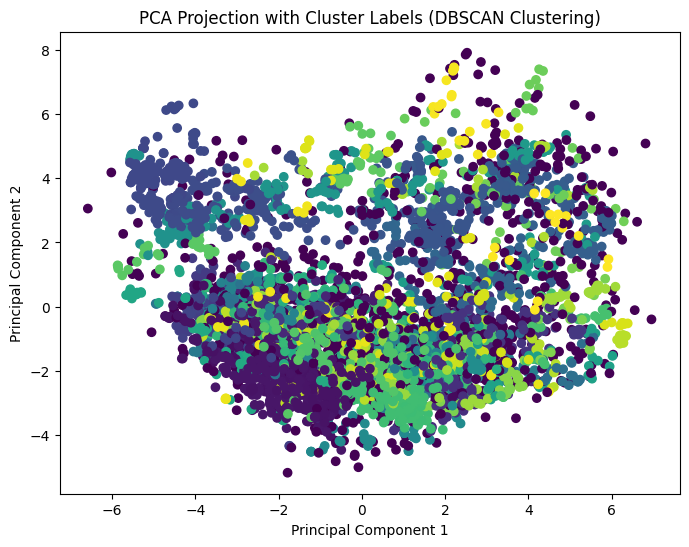

In [13]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Train DBSCAN with optimized hyperparameters
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
cluster_labels = dbscan.fit_predict(features)

# Project the data using PCA
pca = PCA(n_components=2)
projected_data = pca.fit_transform(features)

# Draw a scatter plot with cluster IDs as labels
plt.figure(figsize=(8, 6))
plt.scatter(projected_data[:, 0], projected_data[:, 1], c=cluster_labels, cmap='viridis')
plt.title("PCA Projection with Cluster Labels (DBSCAN Clustering)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()